In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow
import keras
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

2023-04-30 16:12:43.361064: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import cactas as C

In [4]:
asymp = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_cropped.npy')
symp = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_cropped.npy')

In [5]:
labels = np.array([0]*len(asymp) + [1]*len(symp))
images = np.concatenate((asymp, symp))

In [6]:
X, y = shuffle(images, labels, random_state=0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [8]:
train_data_gen = ImageDataGenerator(
        rotation_range=5.,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=40,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant'
    )

In [9]:
test_data_gen = ImageDataGenerator()

In [10]:
train = train_data_gen.flow(X_train, y_train)

In [11]:
test = test_data_gen.flow(X_test, y_test)

In [12]:
model = tensorflow.keras.Sequential()

model.add(layers.Conv2D(filters=20, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=50, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(units=256, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=1, activation = 'softmax'))  


2023-04-30 16:12:46.237487: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-30 16:12:46.483558: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-30 16:12:46.486175: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:90:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-30 16:12:46.486194: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-30 16:12:46.521622: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-30 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [14]:
sgd = tensorflow.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [15]:
model.compile(loss=tensorflow.keras.losses.binary_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

In [16]:
batch_size = 32

In [17]:
model.fit_generator(train,steps_per_epoch=len(X_train) // batch_size, verbose=True, epochs=100)

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2023-04-30 16:12:48.955883: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-30 16:12:48.977217: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/100


2023-04-30 16:12:49.376184: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-30 16:12:50.555553: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-30 16:12:52.140087: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-30 16:12:52.140108: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-30 16:12:52.140736: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-30 16:12:52.187774: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-30 16:12:53.529775: I tensorflow/stream_exec

37/37 [==============================] - 6s 11ms/step - loss: 0.7000 - accuracy: 0.4949
Epoch 2/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6943 - accuracy: 0.4957
Epoch 3/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6964 - accuracy: 0.4974
Epoch 4/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6956 - accuracy: 0.4975
Epoch 5/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6965 - accuracy: 0.4957
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6952 - accuracy: 0.4957
Epoch 7/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.4949
Epoch 8/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6941 - accuracy: 0.4940
Epoch 9/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6935 - accuracy: 0.4966
Epoch 10/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6950 - accuracy: 0.4991
Epoch 11/100
37/37 [

37/37 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.4974
Epoch 84/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6922 - accuracy: 0.4957
Epoch 85/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6939 - accuracy: 0.4966
Epoch 86/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.4974
Epoch 87/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6924 - accuracy: 0.4974
Epoch 88/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6921 - accuracy: 0.4949
Epoch 89/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.4983
Epoch 90/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.4983
Epoch 91/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.4949
Epoch 92/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6921 - accuracy: 0.4932
Epoch 93/100


(<matplotlib.image.AxesImage at 0x7f706016c310>, 1)

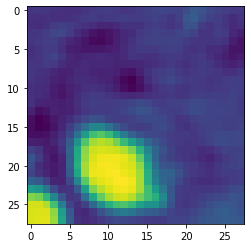

In [18]:
imshow(X_train[0,:,:,0]), y_train[0]

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=100)

In [21]:
X_train_raveled = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_raveled = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

rf.fit(X_train_raveled, y_train)

RandomForestClassifier()

In [22]:
y_pred = rf.predict(X_test_raveled)

In [23]:
import sklearn.metrics

In [24]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.8967136150234741

In [25]:
sklearn.metrics.f1_score(y_test, y_pred)

0.8952380952380953

In [26]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [27]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])